In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import os
# loading all of the csv's from all of the simulations with the macro measured data (total energy, ent. excess, Paccept....)
simlist = []
datafiles = []
csvfiles = []
for root, dirs, files in os.walk("../data/50000"):
    for file in files:
        if file.endswith(".npz"):
            datafiles.append(os.path.join(root,file))
        if file.endswith(".csv"):
            csvfiles.append(os.path.join(root,file))
    for name in dirs:
        simlist.append(name)
simlist = sorted(simlist)
datafiles = sorted(datafiles)
csvfiles = sorted(csvfiles)
assert len(simlist) == len(datafiles) == len(csvfiles)


def load_csv(fname,verbose=True):
    if verbose:
        with open(fname) as f:
            print(f.readline().strip('\n'))
    return np.loadtxt(fname,skiprows=1,delimiter=",")

def plot_energy(fpath,csv1,save=False):
    fig,ax1 = plt.subplots()
    ax1.set_title(fpath.split("/")[-2])
    ax1.plot(csv1[:,0],csv1[:,1],label="TotalEnergy")
    ax1.set_xlabel("timesteps")
    ax1.set_ylabel("Total Energy")
    ax1.tick_params(axis ='y', labelcolor="tab:blue")
    ax2  = ax1.twinx()
    ax2.plot(csv1[:,0],csv1[:,2],label="Eexcess",color="tab:orange")
    ax2.set_ylabel("Ent. Excess")
    ax2.tick_params(axis ='y', labelcolor = "tab:orange")
    #plt.show()
    if save:
        fname = fpath[:-4]+"_energy.png"
        print(fname)
        fig.savefig(fname)
        
%matplotlib ipympl

../data/50000/phasediag_alignedlong_K0.5_kbt0.05/phasediag_alignedlong_K0.5_kbt0.05_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.1/phasediag_alignedlong_K0.5_kbt0.1_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.15/phasediag_alignedlong_K0.5_kbt0.15_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.2/phasediag_alignedlong_K0.5_kbt0.2_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.25/phasediag_alignedlong_K0.5_kbt0.25_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.3/phasediag_alignedlong_K0.5_kbt0.3_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.35/phasediag_alignedlong_K0.5_kbt0.35_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.4/phasediag_alignedlong_K0.5_kbt0.4_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.45/phasediag_alignedlong_K0.5_kbt0.45_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.5/phasediag_alignedlong_K0.5_kbt0.5_energy.png
../data/50000/phasediag_alignedlong_K0.5_kbt0.55/phasediag_a

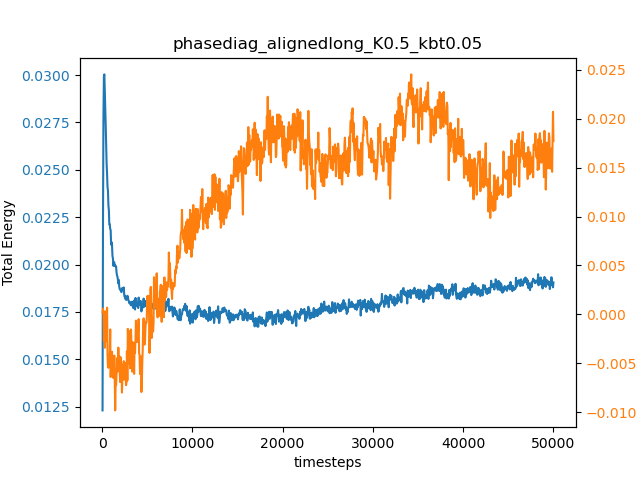

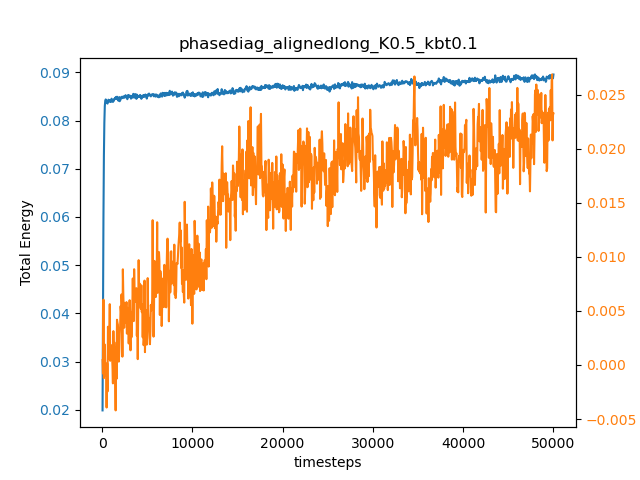

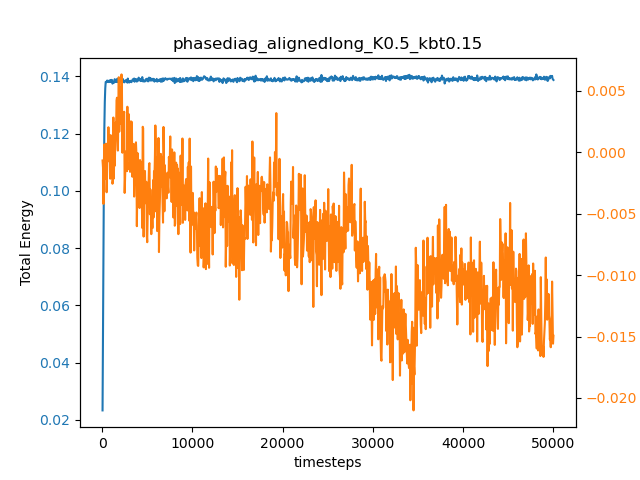

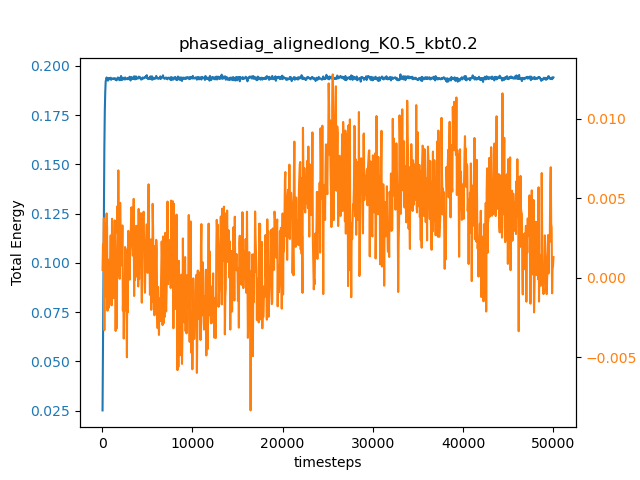

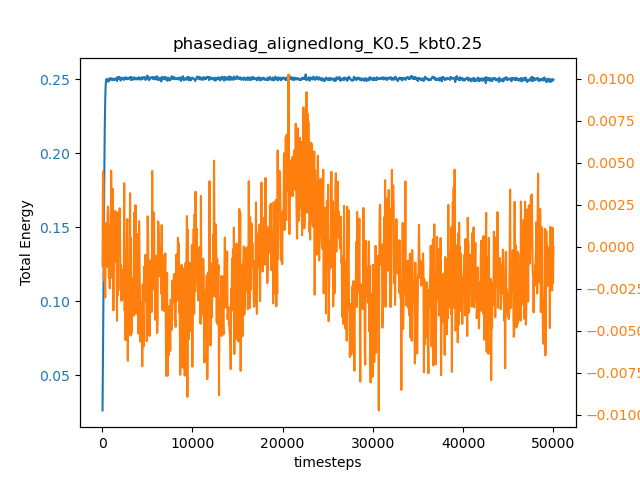

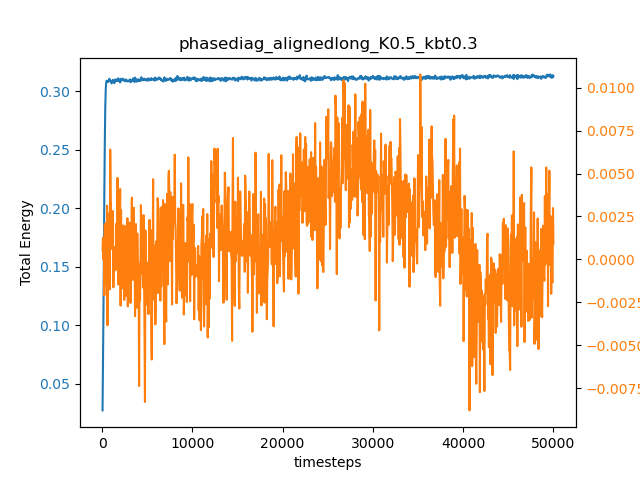

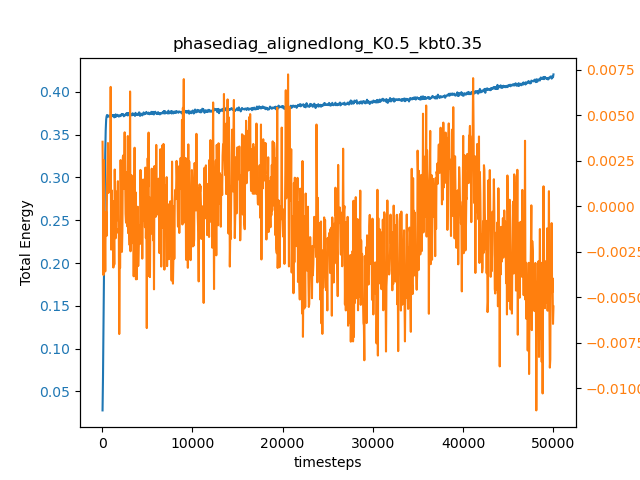

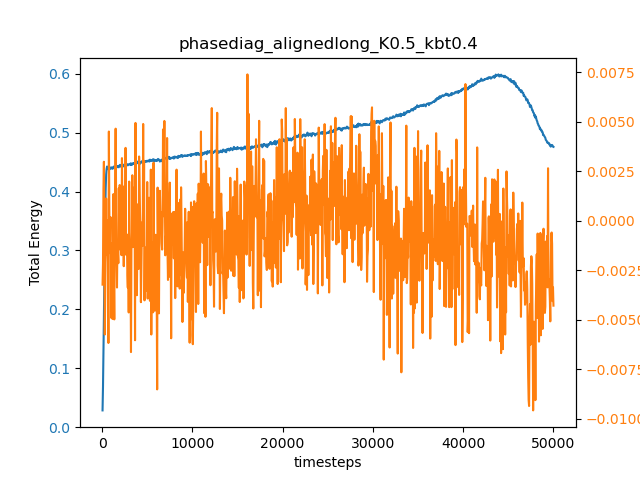

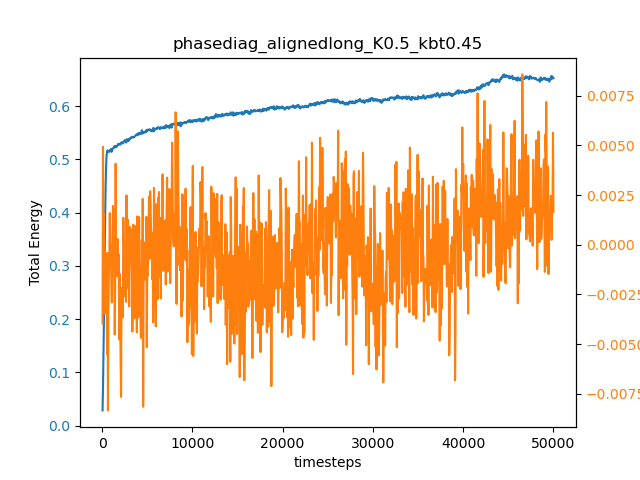

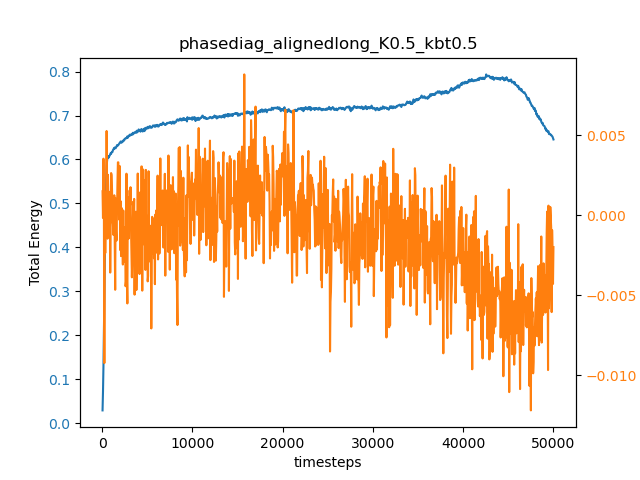

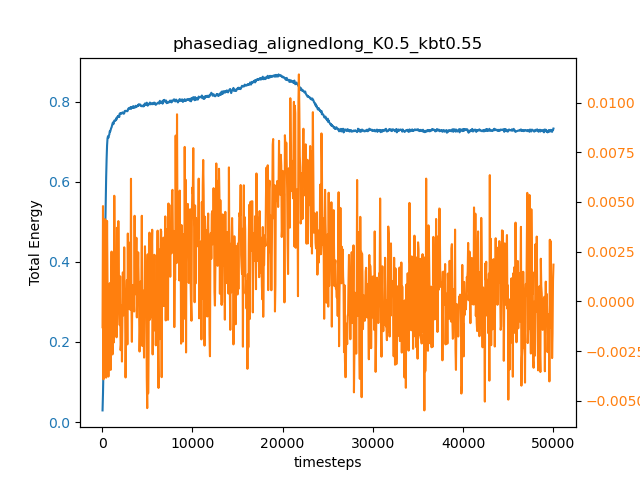

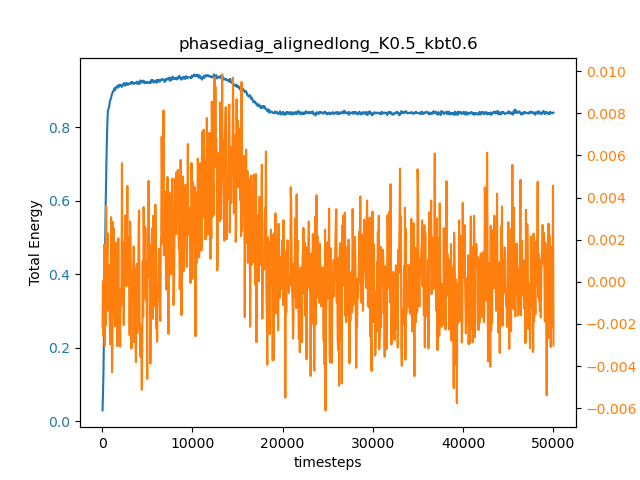

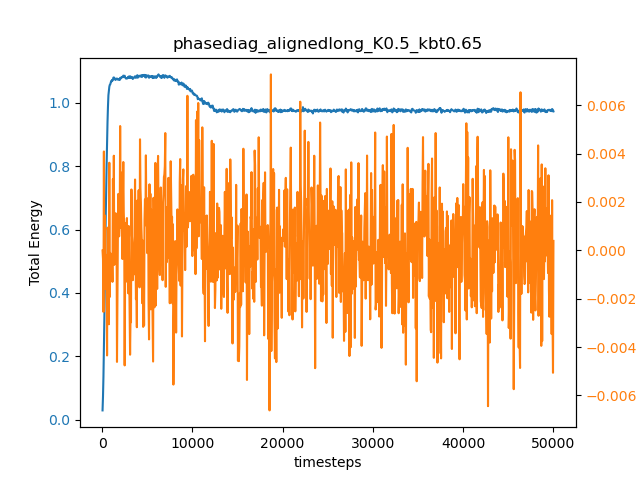

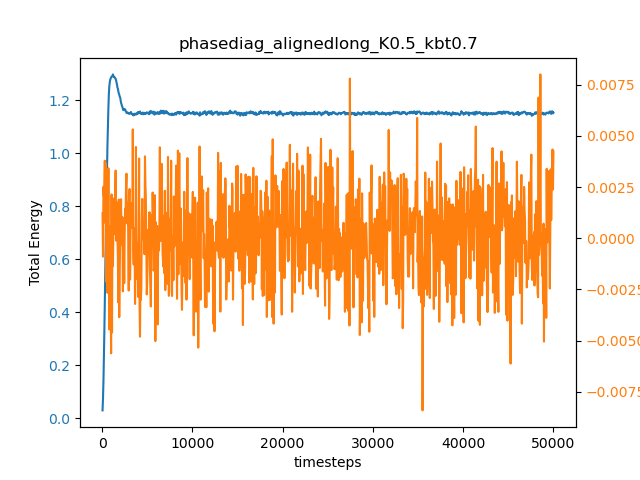

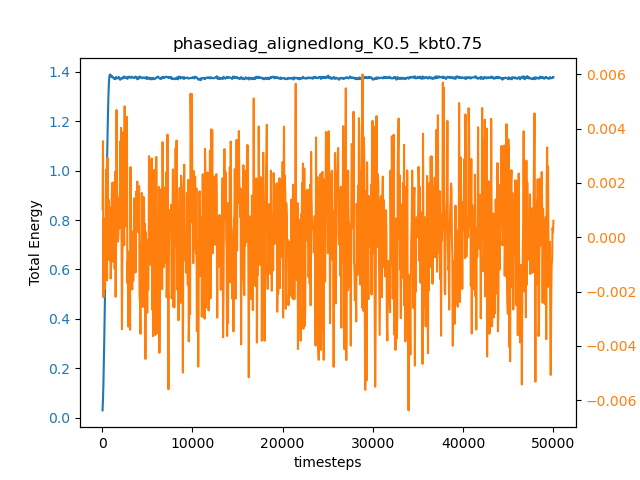

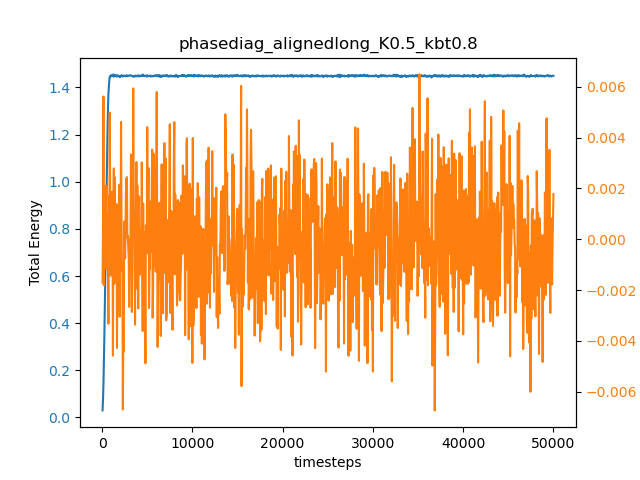

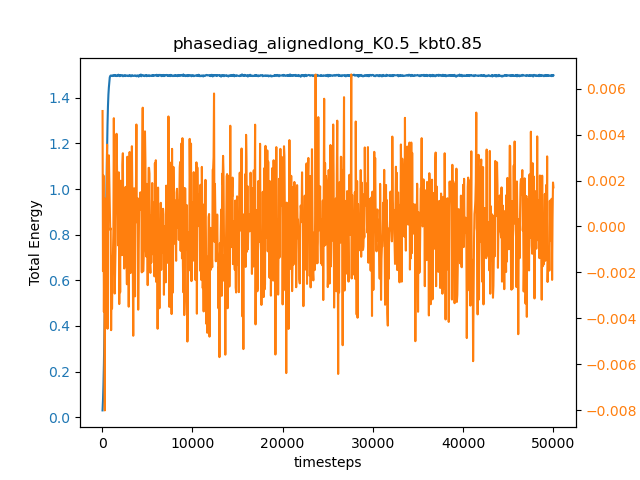

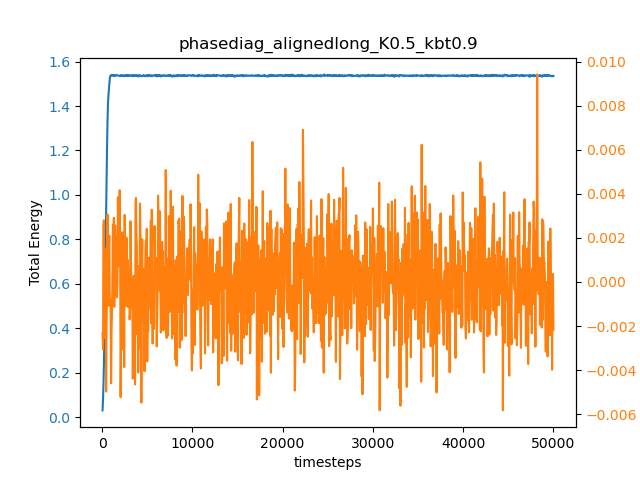

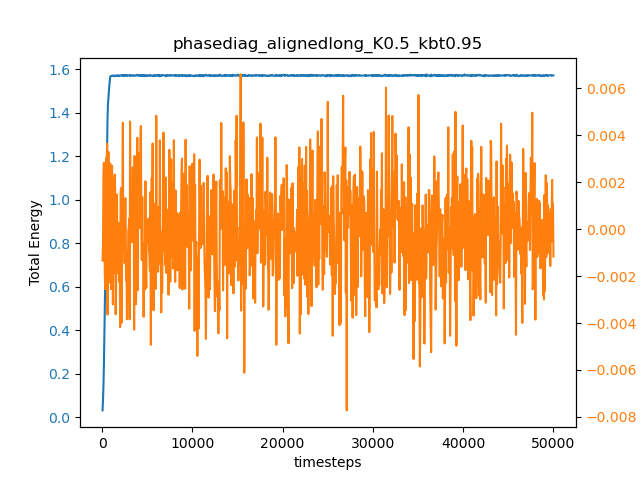

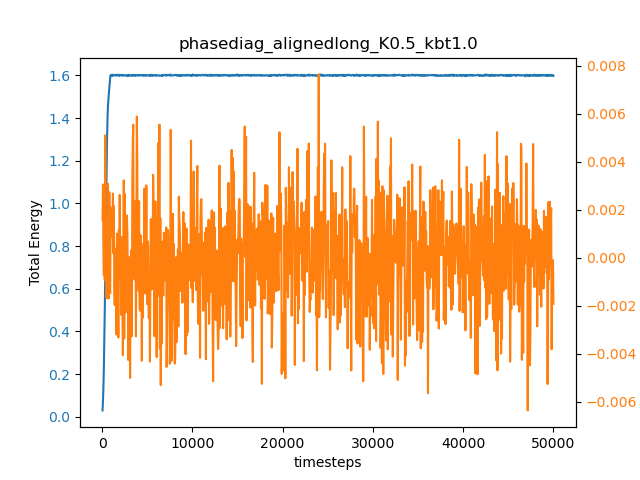

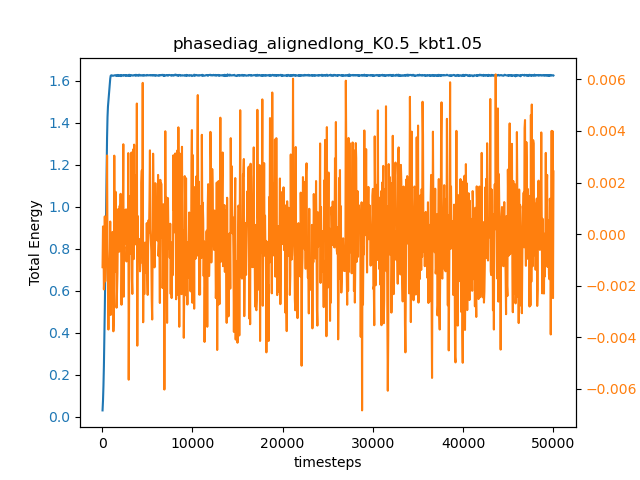

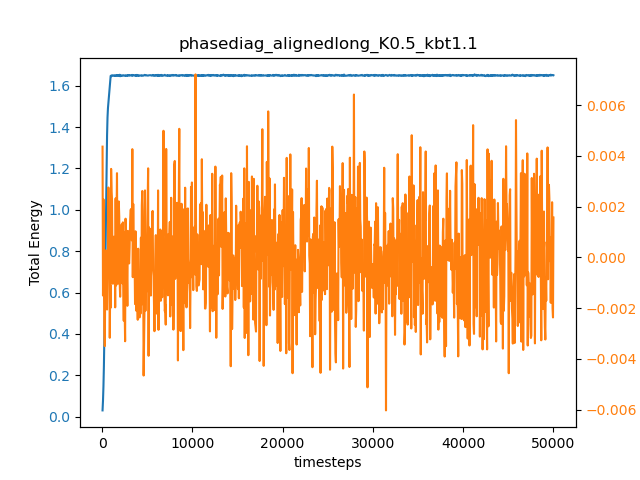

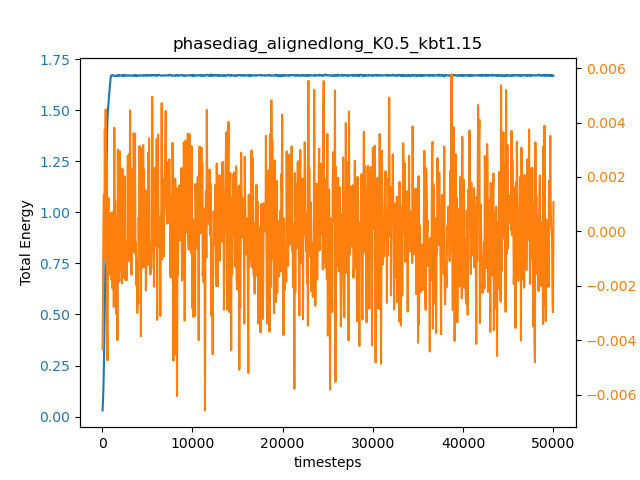

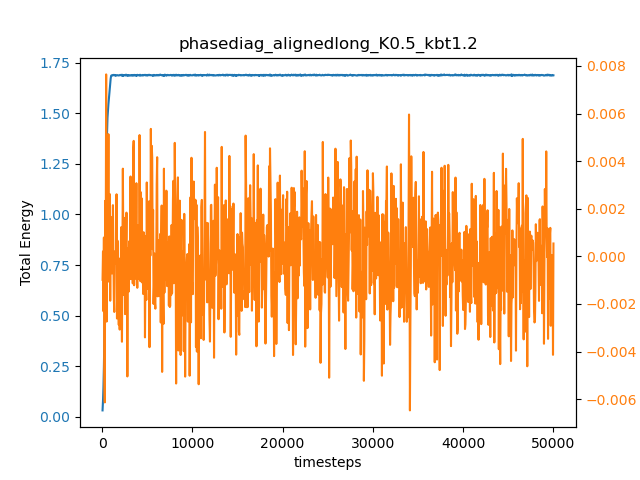

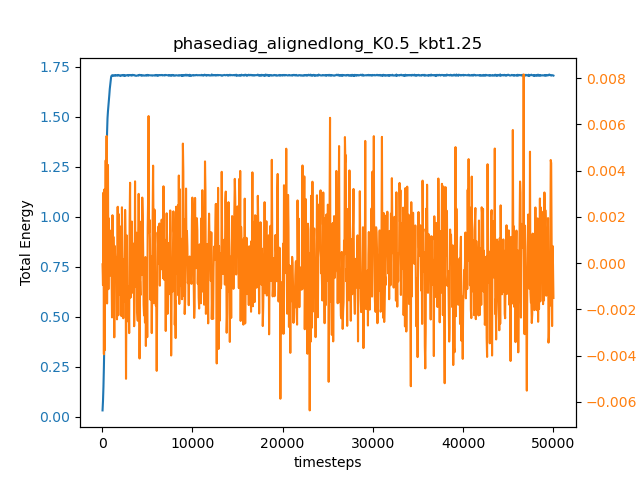

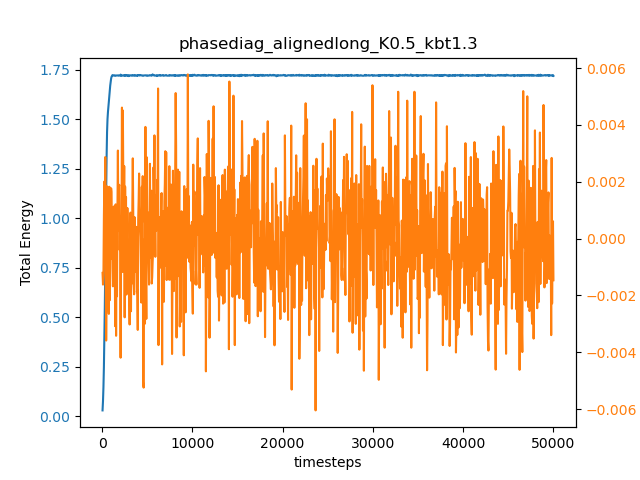

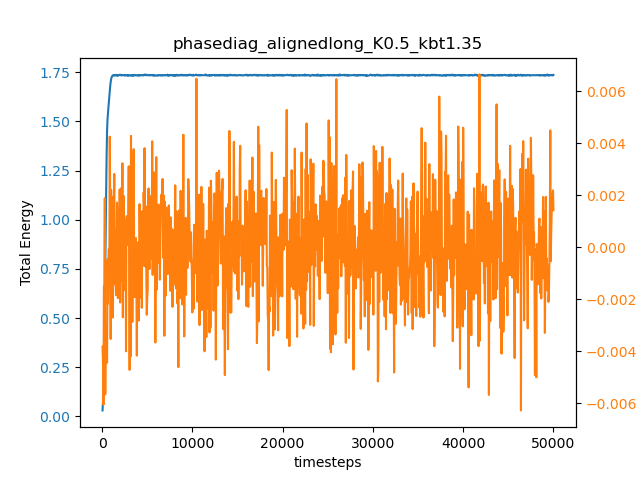

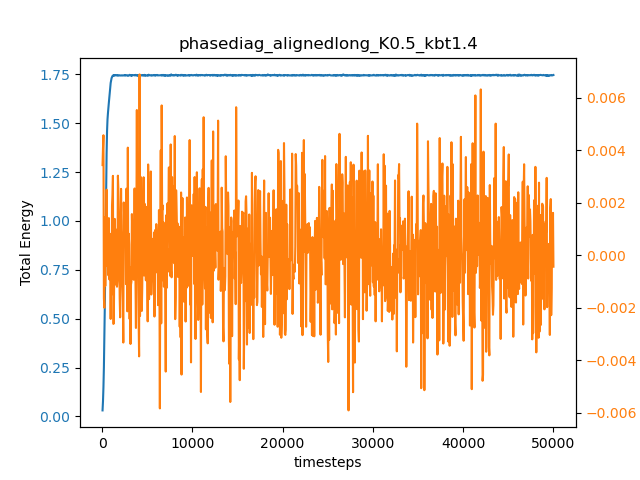

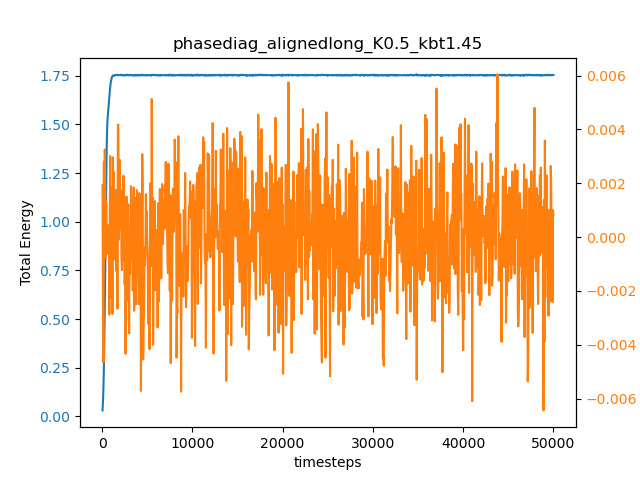

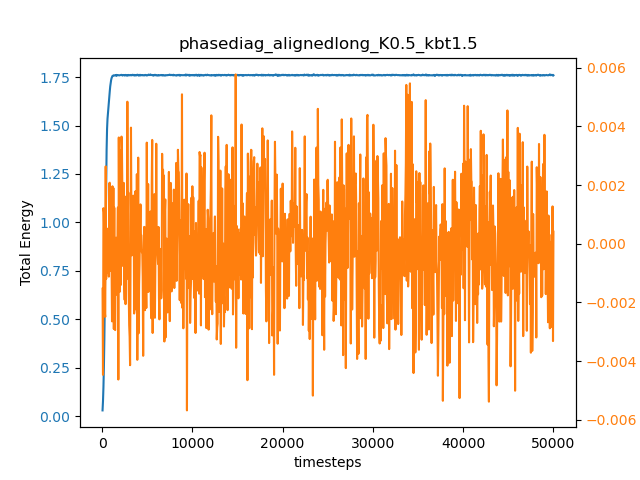

In [30]:
# saving a plot of total energy vs. time and entatiomeric excess vs time
for csvfile  in csvfiles:
    csvdata = load_csv(csvfile,verbose=False)
    plot_energy(csvfile,csvdata,save=True)


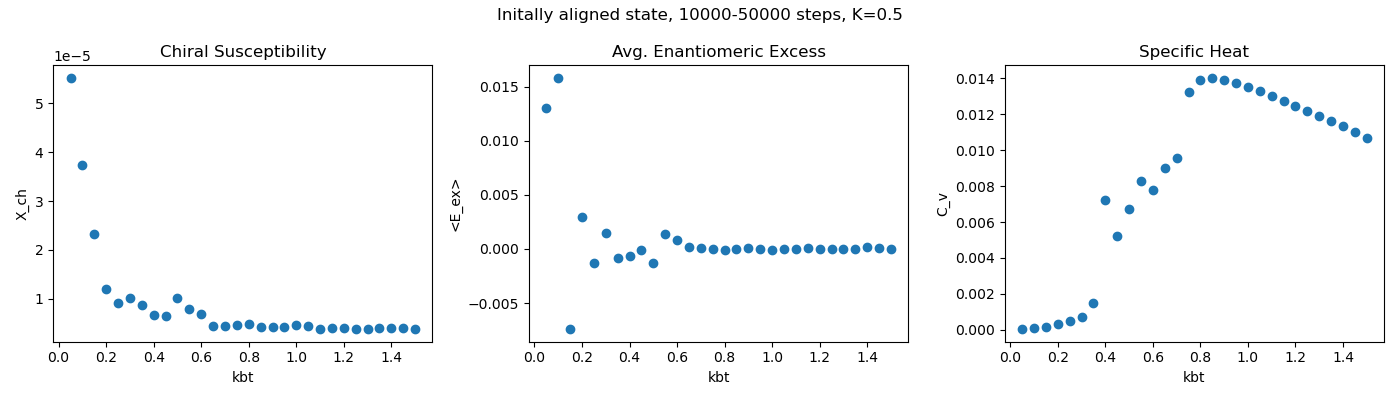

In [33]:
# measuring chiral susceptibility mean(enantionmeric excess^2) - mean(enantiomeric excess^2)
def measure_chi(Kin,init_type="alignedlong"):
    ch_sus = []
    kbts = []
    avg_ent = []
    c_v = []
    for csvfile in csvfiles:
        csv1 = load_csv(csvfile,verbose=False)
        K = float(csvfile.split("/")[3].split("_")[-2][1:])
        if K == Kin and init_type in csvfile:
            kbt = float(csvfile.split("/")[3].split("_")[-1][3:])
            kbts.append(kbt)
            # chiral susceptibility
            excess = csv1[:,2]
            ch_sus.append(np.mean(excess**2) - np.mean(excess)**2)
            # average enantiomeric excess
            avg_ent.append(np.mean(excess))
            #specific heat
            E = csv1[:,1]
            c_v.append((np.mean(E**2) - np.mean(E)**2)/kbt)
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
    fig.suptitle("Initally aligned state, all50000 steps, K="+str(Kin))
    ax1.set_title("Chiral Susceptibility")
    ax1.set_ylabel("X_ch")
    ax1.set_xlabel("kbt")
    ax1.scatter(kbts,ch_sus)
    
    ax2.set_title("Avg. Enantiomeric Excess")
    ax2.set_ylabel("<E_ex>")
    ax2.set_xlabel("kbt")
    ax2.scatter(kbts,avg_ent)
    
    ax3.set_title("Specific Heat")
    ax3.set_ylabel("C_v")
    ax3.set_xlabel("kbt")
    ax3.scatter(kbts,c_v)
    fig.tight_layout()
    plt.show()

measure_chi(0.5)

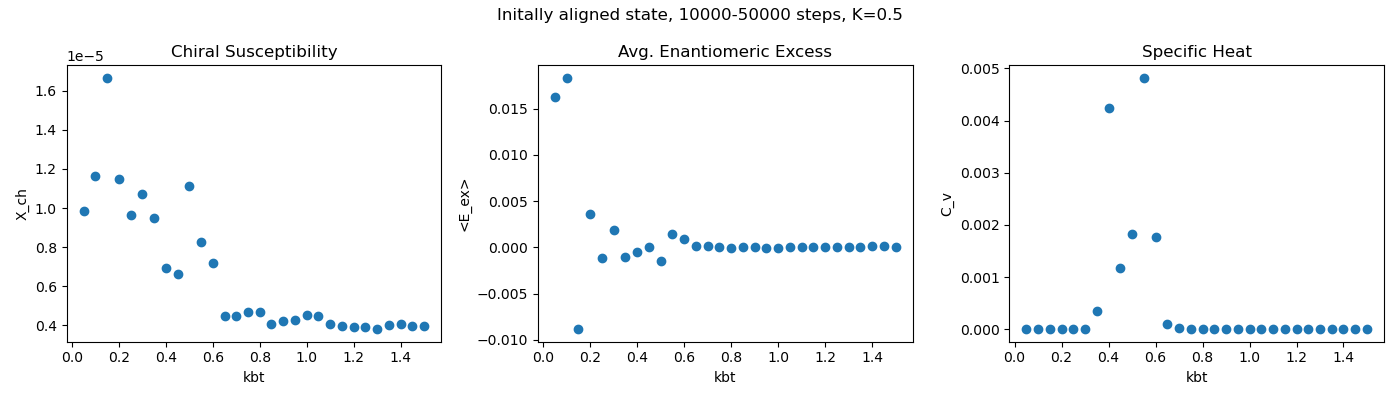

In [34]:
# measuring chiral susceptibility mean(enantionmeric excess^2) - mean(enantiomeric excess^2)
def measure_chi(Kin,init_type="alignedlong"):
    ch_sus = []
    kbts = []
    avg_ent = []
    c_v = []
    for csvfile in csvfiles:
        csv1 = load_csv(csvfile,verbose=False)
        K = float(csvfile.split("/")[3].split("_")[-2][1:])
        if K == Kin and init_type in csvfile:
            kbt = float(csvfile.split("/")[3].split("_")[-1][3:])
            kbts.append(kbt)
            # chiral susceptibility
            excess = csv1[200:,2]
            ch_sus.append(np.mean(excess**2) - np.mean(excess)**2)
            # average enantiomeric excess
            avg_ent.append(np.mean(excess))
            #specific heat
            E = csv1[200:,1]
            c_v.append((np.mean(E**2) - np.mean(E)**2)/kbt)
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
    fig.suptitle("Initally aligned state, 10000-50000 steps, K="+str(Kin))
    ax1.set_title("Chiral Susceptibility")
    ax1.set_ylabel("X_ch")
    ax1.set_xlabel("kbt")
    ax1.scatter(kbts,ch_sus)
    
    ax2.set_title("Avg. Enantiomeric Excess")
    ax2.set_ylabel("<E_ex>")
    ax2.set_xlabel("kbt")
    ax2.scatter(kbts,avg_ent)
    
    ax3.set_title("Specific Heat")
    ax3.set_ylabel("C_v")
    ax3.set_xlabel("kbt")
    ax3.scatter(kbts,c_v)
    fig.tight_layout()
    plt.show()

measure_chi(0.5)